In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
filepath = r'.\data\housing.csv'
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv(filepath, sep = '\s+', header = None, names = column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
X = df[['RM', 'PTRATIO', 'TAX', 'LSTAT']]
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

c:\Users\AyaZeplovitch\OneDrive - Kubrick Group\Desktop\JPM\jpm_project\venv\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\AyaZeplovitch\OneDrive - Kubrick Group\Desktop\JPM\jpm_project\venv\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


<Axes: xlabel='MEDV'>

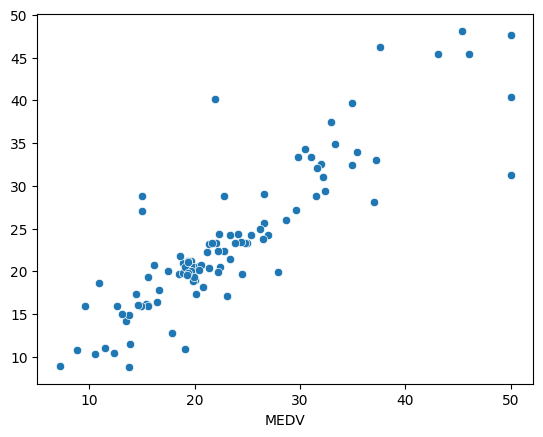

In [4]:
from gradient_boosting_tree.gradient_boosting import GradientBoostingRegressor

model = GradientBoostingRegressor()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
sns.scatterplot(x = y_test, y = y_pred)

In [5]:
from gradient_boosting_tree.utils import performance_evaluation
performance_evaluation(y_test, y_pred)

Mean absolute error is 2.8321
MSE (test): 19.4860
RMSE (test): 4.4143
R-squared is 0.7645


In [6]:
# from gradient_boosting_tree.draft_gradient_boosting import GradientBoostingRegressor

# model = GradientBoostingRegressor()

# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)
# sns.scatterplot(x = y_test, y = y_pred)

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [8]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean absolute error is {mae:.4f}')
print(f'MSE (test): {mse:.4f}')
print(f'RMSE (test): {mse**0.5:.4f}')
print(f'R-squared is {r2:.4f}')

Mean absolute error is 2.8321
MSE (test): 19.4860
RMSE (test): 4.4143
R-squared is 0.7645
